

# Logistic Regression - Project Telecom Churn Prediction

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------

import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once


##  Telecom company's customer churn


**Abstract:** 
- The data is related with Major Telecom company's customer churn.
- The classification goal is to predict if the client will churn __ customer churned or not (Yes or No) is (variable y)__.



**Data Set Information:**



| Tables        | Column Name                     | Description                                                   |
| ------------- |:-------------------------------:| -------------------------------------------------------------:|
| col0          |  CustomerID                     |Passenger Identity                                             |
| col1          |  Gender	                      |Whether the customer is a male or a female                     |
| col2          |  SeniorCitizen                  |Whether the customer is a senior citizen or not (1, 0)         |
| col3          |  Partner	                      |Whether the customer has a partner or not (Yes, No)            |
| Col4          |  Dependents                     |Whether the customer has dependents or not (Yes, No)           |
| Col5          |  Tenure                         |Number of months the customer has stayed with the company      |
| Col6          |  PhoneService                   |Whether the customer has a phone service or not (Yes, No)      |
| Col7          |  MultipleLines	              |Whether the customer has multiple lines or not                 |
|               |                                 |   (Yes, No, No phone service)                                 |
|Col8           |  InternetService	              |Customer’s internet service provider (DSL, Fiber optic, No)    |
|Col9           |  OnlineSecurity	              |Whether the customer has online security or not (Y,N,Ninternet)|
|Col10          |   OnlineBackup	              |Whether the customer has online backup or not (Y,N,Ninternet)  |
|Col11          | DeviceProtection	              |Whether the customer has device protection ornot(Y,N,Ninternet)|
|Col12          |TechSupport	                  |Whether the customer has tech support or not (Y,N,Ninternet)   |
|Col13          |StreamingTV	                  |Whether the customer has streaming TV or not(Y,N,Ninternet)    |
|Col14          |StreamingMovies	              |Whether the customer has streaming movies or not(Y,N,Ninternet)|
|Col15          | Contract	                      |The contract term of the customer (Month-to-month,1year,2year) |
|Col16          |PaperlessBilling	              |Whether the customer has paperless billing or not (Yes, No)    |
|Col17          |PaymentMethod	                  |The customer’s payment method (Electronic check, Mailed check  |
|               |                                 |    Bank transfer (automatic),  Credit card (automatic))       |
|Col18          |MonthlyCharges	                  |The amount charged to the customer monthly                     |
|Col19          |TotalCharges	                  |The total amount charged to the customer                       |
|Col20          |Churn	                          |Whether the customer churned or not (Yes or No)                |



### Import the dataset

- Use pandas library to read the csv format.

In [2]:
import pandas as pd
import numpy as np
Churn_train = pd.read_csv('Churn_train.csv')
Churn_test  = pd.read_csv('Churn_test.csv')
Churn_train.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45000,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40000,2044.75,No


### Check the columns present in the dataset

In [3]:
Churn_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Check the shape of Dataset

In [4]:
print(Churn_train.shape)
print(Churn_test.shape)

(5634, 21)
(1409, 20)


In [5]:
print(Churn_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


<AxesSubplot:>

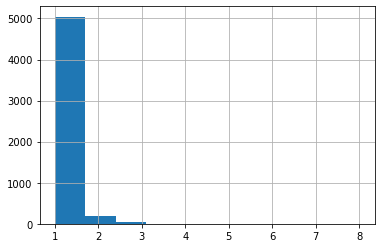

In [6]:
Churn_train['TotalCharges'].value_counts().hist()

In [7]:
#Churn_train['TotalCharges']= Churn_train.TotalCharges.convert_objects(convert_numeric=True)
Churn_train['TotalCharges'] = pd.to_numeric(Churn_train['TotalCharges'],errors = 'coerce')
Churn_test['TotalCharges'] = pd.to_numeric(Churn_test['TotalCharges'],errors = 'coerce')

In [8]:
Churn_train['TotalCharges']  = Churn_train['TotalCharges'].astype ('float64')
Churn_test['TotalCharges']  = Churn_test['TotalCharges'].astype ('float64')
#Churn_test['TotalCharges']  = Churn_test['TotalCharges'].astype ('float64')

In [9]:
Churn_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Check the descriptive statistics of the dataset

In [10]:
Churn_train.describe() 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5634.00000,5634.00000,5634.00000,5626.00000
mean,0.16187,32.27796,64.77913,2280.66238
std,0.36837,24.55521,30.10499,2266.39462
min,0.00000,0.00000,18.25000,18.80000
25%,0.00000,9.00000,35.40000,391.90000
50%,0.00000,29.00000,70.37500,1394.80000
75%,0.00000,55.00000,89.85000,3794.48750
max,1.00000,72.00000,118.65000,8684.80000


In [11]:
Churn_test.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1409.00000,1409.00000,1409.00000,1406.00000
mean,0.16324,32.74379,64.69198,2293.85644
std,0.36971,24.58174,30.04078,2269.05432
min,0.00000,0.00000,18.70000,19.20000
25%,0.00000,9.00000,36.85000,423.68750
50%,0.00000,29.00000,70.15000,1413.55000
75%,0.00000,56.00000,89.85000,3791.87500
max,1.00000,72.00000,118.75000,8672.45000


### Check the info of the dataset

In [12]:
print(Churn_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


###  Write a code to understand the below mentioned variables and print their 'unique' attributes.
``` [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',] ```


- Use the `.unique()` function.
- Print the values separately.

In [13]:
cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
def log():
    print('Gender these unique values:',Churn_train['gender'].value_counts())
    print('SeniorCitizen have these unique values:',Churn_train['SeniorCitizen'].value_counts())
    print(' Partner have these unique values:',Churn_train['Partner'].value_counts())
    print(' Dependents have these unique values:',Churn_train['Dependents'].value_counts())
   
    print('PhoneService have these unique values:',Churn_train['PhoneService'].value_counts())
    print(' MultipleLines have these unique values:',Churn_train['MultipleLines'].value_counts())
    print(' InternetService have these unique values:',Churn_train['InternetService'].value_counts())
    print('OnlineSecurity have these unique values:',Churn_train['OnlineSecurity'].value_counts())
    print('OnlineBackup have these unique values:',Churn_train['OnlineBackup'].value_counts())
    print('DeviceProtection have these unique values:',Churn_train['DeviceProtection'].value_counts())
    print('TechSupport have these unique values:',Churn_train['TechSupport'].value_counts())
    print('StreamingTV have these unique values:',Churn_train['StreamingTV'].value_counts())
    print('StreamingMovies have these unique values:',Churn_train['StreamingMovies'].value_counts())
    print('Contract have these unique values:',Churn_train['Contract'].value_counts())
    print('PaymentMethod have these unique values:',Churn_train['PaymentMethod'].value_counts())
    print('PaperlessBilling have these unique values:',Churn_train['PaperlessBilling'].value_counts())
    print('Churn these unique values:',Churn_train['Churn'].value_counts())
    
    
   # The code output should be user-friendly.
    # For eg- Job have these unique values: ['.........']
log()

Gender these unique values: Male      2838
Female    2796
Name: gender, dtype: int64
SeniorCitizen have these unique values: 0    4722
1     912
Name: SeniorCitizen, dtype: int64
 Partner have these unique values: No     2932
Yes    2702
Name: Partner, dtype: int64
 Dependents have these unique values: No     3968
Yes    1666
Name: Dependents, dtype: int64
PhoneService have these unique values: Yes    5087
No      547
Name: PhoneService, dtype: int64
 MultipleLines have these unique values: No                  2700
Yes                 2387
No phone service     547
Name: MultipleLines, dtype: int64
 InternetService have these unique values: Fiber optic    2479
DSL            1934
No             1221
Name: InternetService, dtype: int64
OnlineSecurity have these unique values: No                     2801
Yes                    1612
No internet service    1221
Name: OnlineSecurity, dtype: int64
OnlineBackup have these unique values: No                     2498
Yes                    1915
N

###  Write a code to check the min and max value of age. Also check if there is any null value or not.

- Use the `'.max()', '.min()', 'isnull()' and 'any()'` function

In [14]:
def log():
    print(Churn_train['tenure'].min())
    print(Churn_train['tenure'].max()) # print the max age
    # print the min age
    print(Churn_train.isnull().any() )                # print the missing values if any
log()

0
72
customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool


In [15]:
print(Churn_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [16]:
Churn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


<AxesSubplot:>

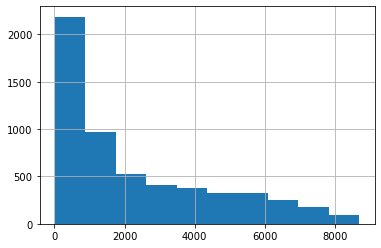

In [17]:
Churn_train['TotalCharges'].hist()

In [18]:
Churn_train['TotalCharges'].fillna(Churn_train['TotalCharges'].median(), inplace=True) 

In [19]:
Churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


<AxesSubplot:>

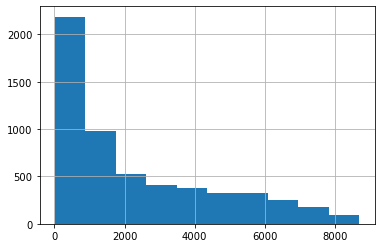

In [20]:
Churn_train['TotalCharges'].hist()

In [21]:
Churn_test['TotalCharges'].fillna(Churn_test['TotalCharges'].median(), inplace=True) 

In [22]:
Churn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


<AxesSubplot:>

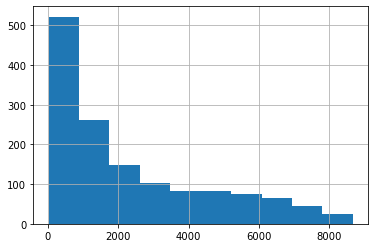

In [23]:
Churn_test['TotalCharges'].hist()

<AxesSubplot:>

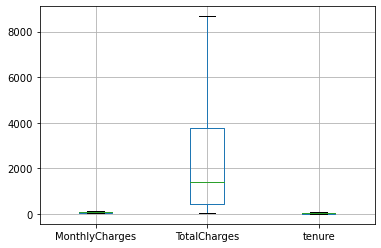

In [24]:
Churn_test.boxplot(column=['MonthlyCharges', 'TotalCharges', 'tenure'])

### Count of Yes and No for Churn

In [25]:
Churn_train['Churn'].value_counts() #we are using '.value_counts()' function which outputs the number of occurence of categories within a feature 
# to check balance in TV #It was 40% data in yes category, so balanced data

No     4113
Yes    1521
Name: Churn, dtype: int64

###  Write a user defined function to calculate the Inter quartile range for quantile values outside 25 to 75 range. And do the outlier capping for lower level with min value and for upper level with 'q3=1.5*iqr' value.

- Use the `.quantile()` function to extract the first and third quantile and save these values in different vatiables.
- Use the created variables in the formula provided above, this creates an upper bound.
- For lower bound use the `min()` function on the column name.

In [26]:
def remove_outlier(df_in, col_name):
    Q1=df_in[col_name].quantile(0.25)   # Calculate quantile 1 using quantile(0.25)
    Q3=df_in[col_name].quantile(0.75)    # Calculate quantile 3
    IQR = Q3-Q1            # Calculate IQR as difference of Quantile 3 and quantile 1
    lower_bound = df_in[col_name].min()          # Find the lower bound using the min() function
    upper_bound = Q3 + 1.5*IQR            # Find the upper bound as quantile3 + 1.5*IQR
    #print('Column',col_name,'IQR lower bound and upper bound are', lower_bound, 'and', upper_bound, 'respectively')
    print(lower_bound, upper_bound)        # Print the lower and upper bound of the column
    df_out = df_in.loc[(df_in[col_name] > lower_bound) & (df_in[col_name] < upper_bound)]    # Remove the values lying outside min and upper bound range
    return df_out


### Using the above created function , remove the outlier from 'MonthlyCharges' variables:

In [27]:
#def log(Churn_train):
    #return remove_outlier(Churn_train, 'MonthlyCharges') # your code to remove the outlier from age

#Churn_train=log(Churn_train)

### Using the above created function , remove the outlier from 'TotalCharges' variables:

In [28]:
def log(Churn_train):
    return remove_outlier(Churn_train, 'TotalCharges')# your code to remove the outlier from campaign
Churn_train = log(Churn_train) 

18.8 8879.5875


In [29]:
Churn_train.set_index('customerID', inplace=True)

### Using the above created function , remove the outlier from 'Tenure' variables:

In [30]:
def log(Churn_train):
    return remove_outlier(Churn_train, 'tenure')# your code to remove the outlier from tenure
Churn_train = log(Churn_train) 

0 124.0


### Dividing dataset into two, on the basis of categorical and numerical.

In [31]:
Churn_train_cont=Churn_train[['MonthlyCharges', 'TotalCharges', 'tenure']]

#display(Churn_train_cont).head(5)

In [32]:
Churn_train_cat = Churn_train.drop(['MonthlyCharges', 'TotalCharges', 'tenure'], axis=1)

#print(Churn_train_cat).head()

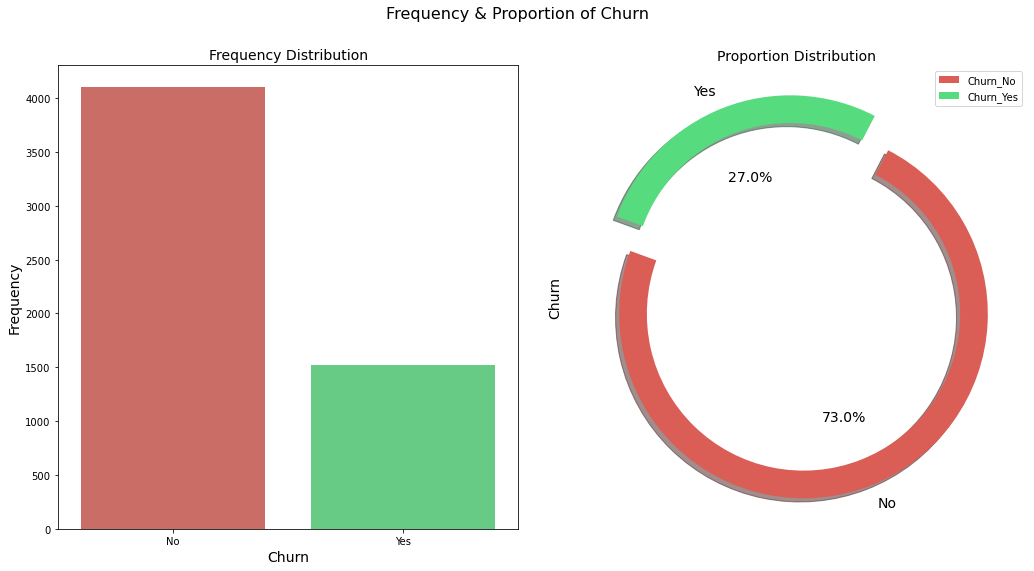

In [33]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
sns.countplot(x = 'Churn', data = Churn_train, palette = ['#DB5E56','#56DB7F'])
plt.xlabel(xlabel = 'Churn', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(2)/10
Churn_train['Churn'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True, colors = ['#DB5E56','#56DB7F'])
plt.legend(['Churn_No', 'Churn_Yes'])
plt.ylabel(ylabel = 'Churn', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Churn', y = 1.02, size = 16)
plt.show()

# how is the distribution of Churn and No Churn with respect to Tenure in Months ?

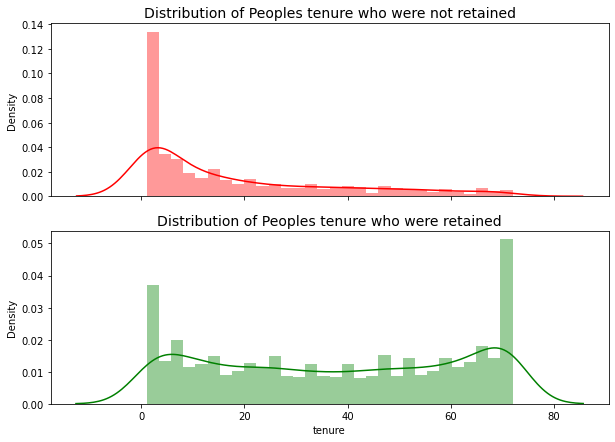

In [34]:
# Slicing data with Churned
Not_retained = Churn_train['tenure'][Churn_train['Churn'] == 'Yes']

# Slicing data with not Churned
retained = Churn_train['tenure'][Churn_train['Churn'] == 'No']

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (10, 7))
sns.distplot(a = Not_retained, bins = 30, ax = ax1, color = 'red')
ax1.set_title(label = 'Distribution of Peoples tenure who were not retained', size = 14)
ax1.set_xlabel(xlabel = 'tenure')
sns.distplot(a = retained, bins = 30, ax = ax2, color = 'green')
ax2.set_title(label = 'Distribution of Peoples tenure who were retained', size = 14)
plt.show()


- Number of months the customer who churned stayed with the company is anywhere from 1-35 months after which churning reduced to 1/3 rd what it was earlier
- In case of customer who didnt churn seems steady and sudden spike at 76 months 

# Is there a connection between monthly charges and churn

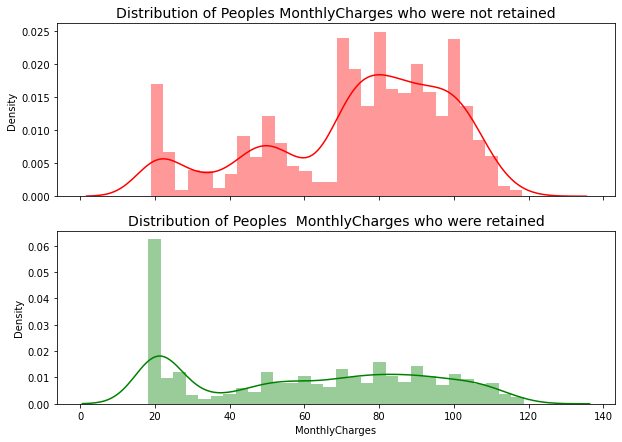

In [35]:
# Slicing data with Churned
Not_retained = Churn_train['MonthlyCharges'][Churn_train['Churn'] == 'Yes']

# Slicing data with not Churned
retained = Churn_train['MonthlyCharges'][Churn_train['Churn'] == 'No']

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (10, 7))
sns.distplot(a = Not_retained, bins = 30, ax = ax1, color = 'red')
ax1.set_title(label = 'Distribution of Peoples MonthlyCharges who were not retained', size = 14)
ax1.set_xlabel(xlabel = 'tenure')
sns.distplot(a = retained, bins = 30, ax = ax2, color = 'green')
ax2.set_title(label = 'Distribution of Peoples  MonthlyCharges who were retained', size = 14)
plt.show()


- Not so interestingly, higher number of customers who churned had high monthlycharges from 70 and 120 dollars months 
- In case of customer who didnt churn seems have low monthly charges  (atleast decent sample population) and rest of the population had healthy mix of monthlycharges which reasons why they remained loyal

# Is having multiple lines- any influence on Churn?

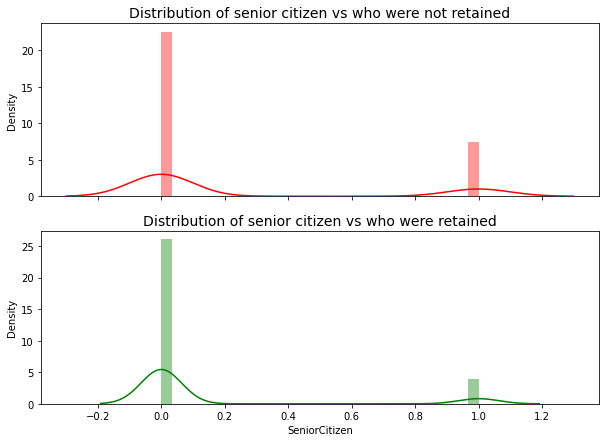

In [36]:
# Slicing data with Churned
Not_retained = Churn_train['SeniorCitizen'][Churn_train['Churn'] == 'Yes']

# Slicing data with not Churned
retained = Churn_train['SeniorCitizen'][Churn_train['Churn'] == 'No']

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (10, 7))
sns.distplot(a = Not_retained, bins = 30, ax = ax1, color = 'red')
ax1.set_title(label = 'Distribution of senior citizen vs who were not retained', size = 14)
ax1.set_xlabel(xlabel = 'tenure')
sns.distplot(a = retained, bins = 30, ax = ax2, color = 'green')
ax2.set_title(label = 'Distribution of senior citizen vs who were retained', size = 14)
plt.show()

- It seems no surprise here also, very high number of SEnior Citizens were retained, in comparison not retained is about 1/10 th of the density of retained

In [37]:
Churn_train[['MonthlyCharges','Contract']].groupby(by = 'Contract').describe()

MonthlyCharges                                               \
                        count     mean      std      min      25%      50%   
Contract                                                                     
Month-to-month     3104.00000 66.38800 27.09548 18.75000 45.75000 73.55000   
One year           1184.00000 65.59616 31.73302 18.25000 34.57500 69.15000   
Two year           1337.00000 60.48631 34.52747 18.40000 24.00000 64.35000   

                                   
                    75%       max  
Contract                           
Month-to-month 89.06250 117.45000  
One year       94.90000 118.35000  
Two year       90.05000 118.65000

- We can **observe** that even though Contracts changed min and max didnt change much


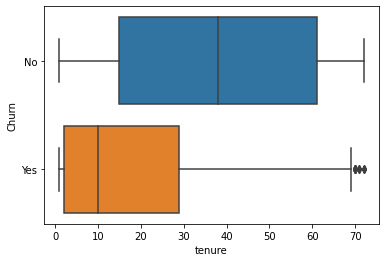

In [38]:
sns.boxplot(x = 'tenure', y = 'Churn', data =Churn_train )
plt.show()

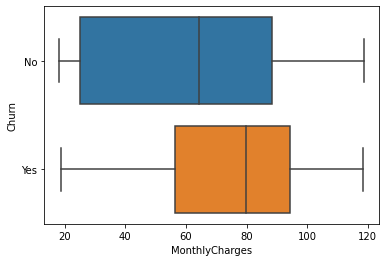

In [39]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data =Churn_train )
plt.show()

<Figure size 1080x360 with 0 Axes>

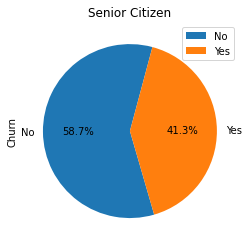

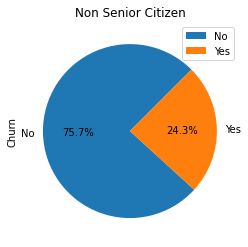

In [40]:
plt.figure(figsize=(15,5))
pie_SeniorCitizen_Y = pd.DataFrame(Churn_train[Churn_train['SeniorCitizen'] == 1]['Churn'].value_counts())
pie_SeniorCitizen_Y.plot.pie(subplots = True, labels = pie_SeniorCitizen_Y.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Senior Citizen')
plt.gca().set_aspect('equal')

pie_SeniorCitizen_N = pd.DataFrame(Churn_train[Churn_train['SeniorCitizen'] == 0]['Churn'].value_counts())
pie_SeniorCitizen_N.plot.pie(subplots = True, labels = pie_SeniorCitizen_N.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Non Senior Citizen')

plt.gca().set_aspect('equal')
plt.show() 

<Figure size 1080x360 with 0 Axes>

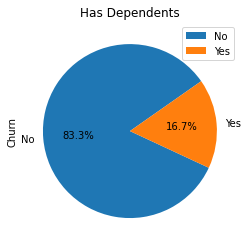

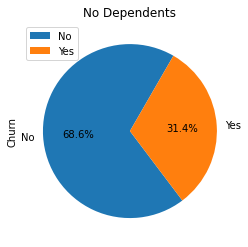

In [41]:
plt.figure(figsize=(15,5))
pie_Dependents_Y = pd.DataFrame(Churn_train[Churn_train['Dependents'] == 'Yes']['Churn'].value_counts())
pie_Dependents_Y.plot.pie(subplots = True,  labels = pie_Dependents_Y.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Has Dependents')
plt.gca().set_aspect('equal')

pie_Dependents_N = pd.DataFrame(Churn_train[Churn_train['Dependents'] == 'No']['Churn'].value_counts())
pie_Dependents_N.plot.pie(subplots = True,  labels = pie_Dependents_N.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('No Dependents')

plt.gca().set_aspect('equal')
plt.show() 

<Figure size 1080x360 with 0 Axes>

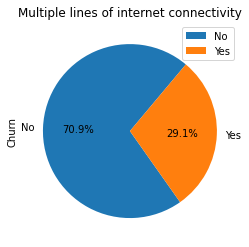

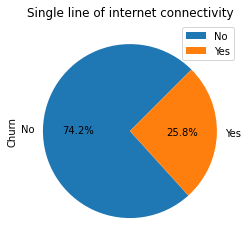

In [42]:
plt.figure(figsize=(15,5))
pie_MultipleLines_Y = pd.DataFrame(Churn_train[Churn_train['MultipleLines'] == 'Yes']['Churn'].value_counts())
pie_MultipleLines_Y.plot.pie(subplots = True,  labels = pie_MultipleLines_Y.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Multiple lines of internet connectivity')
plt.gca().set_aspect('equal')

pie_MultipleLines_N = pd.DataFrame(Churn_train[Churn_train['MultipleLines'] == 'No']['Churn'].value_counts())
pie_MultipleLines_N.plot.pie(subplots = True,  labels = pie_MultipleLines_N.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Single line of internet connectivity')

plt.gca().set_aspect('equal')
plt.show() 

<Figure size 1080x360 with 0 Axes>

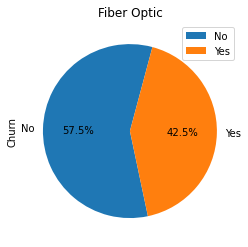

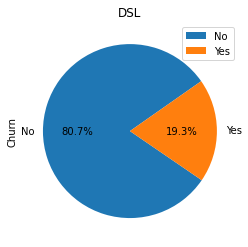

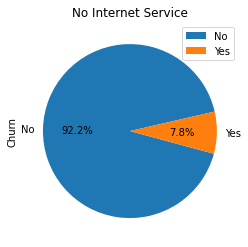

In [43]:
plt.figure(figsize=(15,5))
pie_InternetService_fo = pd.DataFrame(Churn_train[Churn_train['InternetService'] == "Fiber optic"]['Churn'].value_counts())
pie_InternetService_fo.plot.pie(subplots = True, labels = pie_InternetService_fo.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Fiber Optic')
plt.gca().set_aspect('equal')

pie_InternetService_dsl = pd.DataFrame(Churn_train[Churn_train['InternetService'] == "DSL"]['Churn'].value_counts())
pie_InternetService_dsl.plot.pie(subplots = True, labels = pie_InternetService_dsl.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('DSL')
plt.gca().set_aspect('equal')
pie_InternetService_no = pd.DataFrame(Churn_train[Churn_train['InternetService'] == "No"]['Churn'].value_counts())
pie_InternetService_no.plot.pie(subplots = True, labels = pie_InternetService_no.index.values, autopct='%1.1f%%', startangle= 13)
plt.title('No Internet Service')
plt.gca().set_aspect('equal')

plt.show()

<Figure size 1080x360 with 0 Axes>

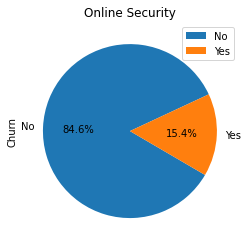

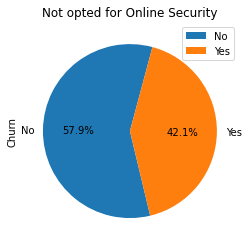

In [44]:
plt.figure(figsize=(15,5))
pie_OnlineSecurity_Y = pd.DataFrame(Churn_train[Churn_train['OnlineSecurity'] == 'Yes']['Churn'].value_counts())
pie_OnlineSecurity_Y.plot.pie(subplots = True,  labels = pie_OnlineSecurity_Y.index.values, autopct='%1.1f%%', startangle= 25)
plt.title('Online Security')
plt.gca().set_aspect('equal')

pie_OnlineSecurity_N = pd.DataFrame(Churn_train[Churn_train['OnlineSecurity'] == 'No']['Churn'].value_counts())
pie_OnlineSecurity_N.plot.pie(subplots = True, labels = pie_OnlineSecurity_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Security')
plt.gca().set_aspect('equal')
plt.show() 

<Figure size 1080x360 with 0 Axes>

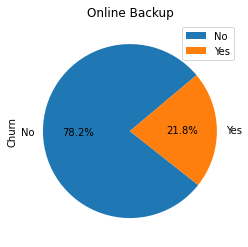

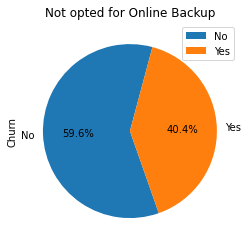

In [45]:
plt.figure(figsize=(15,5))
pie_OnlineBackup_Y = pd.DataFrame(Churn_train[Churn_train['OnlineBackup'] == 'Yes']['Churn'].value_counts())
pie_OnlineBackup_Y.plot.pie(subplots = True,  labels = pie_OnlineBackup_Y.index.values, autopct='%1.1f%%', startangle= 40)
plt.title('Online Backup')
plt.gca().set_aspect('equal')

pie_OnlineBackup_N = pd.DataFrame(Churn_train[Churn_train['OnlineBackup'] == 'No']['Churn'].value_counts())
pie_OnlineBackup_N.plot.pie(subplots = True, labels = pie_OnlineBackup_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Backup')
plt.gca().set_aspect('equal')

plt.show() 

<Figure size 1080x360 with 0 Axes>

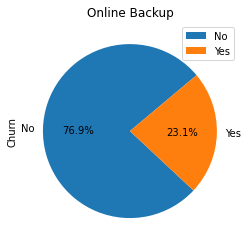

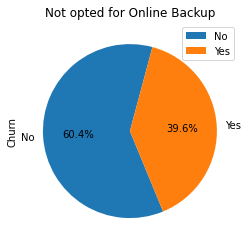

In [46]:
plt.figure(figsize=(15,5))

pie_DeviceProtection_Y = pd.DataFrame(Churn_train[Churn_train['DeviceProtection'] == 'Yes']['Churn'].value_counts())
pie_DeviceProtection_Y.plot.pie(subplots = True, labels = pie_DeviceProtection_Y.index.values, autopct='%1.1f%%', startangle= 40)
plt.title('Online Backup')
plt.gca().set_aspect('equal')

pie_DeviceProtection_N = pd.DataFrame(Churn_train[Churn_train['DeviceProtection'] == 'No']['Churn'].value_counts())
pie_DeviceProtection_N.plot.pie(subplots = True, labels = pie_DeviceProtection_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Backup')
plt.gca().set_aspect('equal')
plt.show() 

<Figure size 1080x360 with 0 Axes>

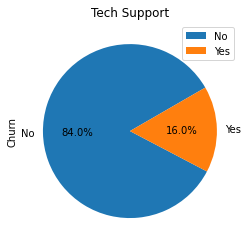

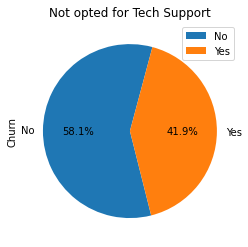

In [47]:
plt.figure(figsize=(15,5))
pie_TechSupport_Y = pd.DataFrame(Churn_train[Churn_train['TechSupport'] == 'Yes']['Churn'].value_counts())
pie_TechSupport_Y.plot.pie(subplots = True,labels = pie_TechSupport_Y.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Tech Support')
plt.gca().set_aspect('equal')

pie_TechSupport_N = pd.DataFrame(Churn_train[Churn_train['TechSupport'] == 'No']['Churn'].value_counts())
pie_TechSupport_N.plot.pie(subplots = True, labels = pie_TechSupport_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Tech Support')

plt.gca().set_aspect('equal')
plt.show() 

<Figure size 1080x360 with 0 Axes>

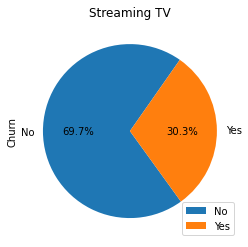

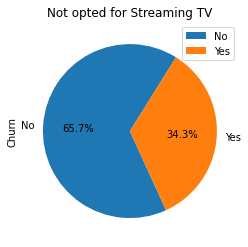

In [48]:
plt.figure(figsize=(15,5))
pie_StreamingTV_Y = pd.DataFrame(Churn_train[Churn_train['StreamingTV'] == 'Yes']['Churn'].value_counts())
pie_StreamingTV_Y.plot.pie(subplots = True, labels = pie_StreamingTV_Y.index.values, autopct='%1.1f%%', startangle= 55)
plt.title('Streaming TV')
plt.gca().set_aspect('equal')

pie_StreamingTV_N = pd.DataFrame(Churn_train[Churn_train['StreamingTV'] == 'No']['Churn'].value_counts())
pie_StreamingTV_N.plot.pie(subplots = True,labels = pie_StreamingTV_N.index.values, autopct='%1.1f%%', startangle= 58)
plt.title('Not opted for Streaming TV')
plt.gca().set_aspect('equal')

plt.show() 

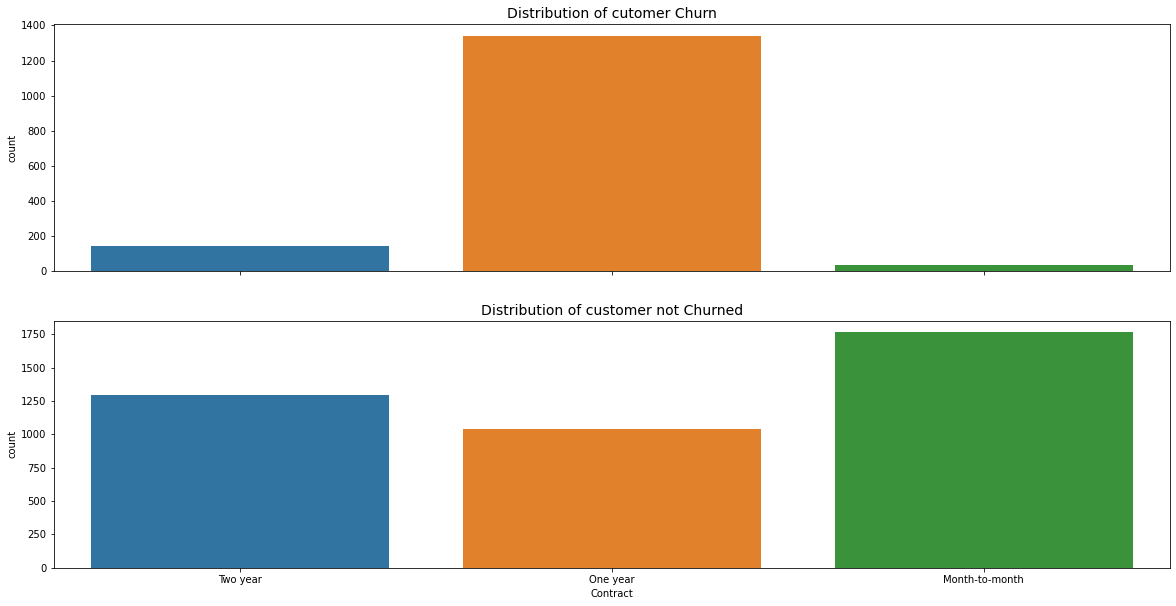

In [49]:
# Slicing data with non-survial
Not_retained = Churn_train['Contract'][Churn_train['Churn'] == 'Yes']

# Slicing data with survival
Retained = Churn_train['Contract'][Churn_train['Churn'] == 'No']

fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 10))
sns.countplot(Not_retained,ax=ax1)
ax1.set_title(label = 'Distribution of cutomer Churn', size = 14)
ax1.set_xlabel(xlabel = '')
sns.countplot(Retained ,ax=ax2)
ax2.set_title(label = 'Distribution of customer not Churned', size = 14)
plt.show()

 - Interestingly, there is a connection between type of contract and Churn, it seems people with 1 year Contract have more tendency to Churn compared to Month to Month contract
 - obviously 2 year contract customers didnt churn


---
# **7. Post Data Processing & Feature Selection**
---
- Now we will **perform encoding of the categorical columns** and **feed it** to the **LogisticRegression**.

In [50]:
#Binary encoding
# List of variables to map

var_list =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Churn_train[var_list] = Churn_train[var_list].apply(binary_map)


In [51]:
Churn_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
5442-PPTJY,Male,0,1,1,12,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,19.70000,258.35000,0
6261-RCVNS,Female,0,0,0,42,1,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,0,Credit card (automatic),73.90000,3160.55000,1
2176-OSJUV,Male,0,1,0,71,1,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,0,Bank transfer (automatic),65.15000,4681.75000,0
6161-ERDGD,Male,0,1,1,71,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,0,Electronic check,85.45000,6300.85000,0
2364-UFROM,Male,0,0,0,30,1,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,0,Electronic check,70.40000,2044.75000,0


In [52]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Churn_train[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
Churn_train = pd.concat([Churn_train, dummy1], axis=1)

In [53]:

Churn_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5442-PPTJY,Male,0,1,1,12,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,19.70000,258.35000,0,0,1,0,0,1,1,0,1
6261-RCVNS,Female,0,0,0,42,1,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,0,Credit card (automatic),73.90000,3160.55000,1,1,0,1,0,0,0,0,0
2176-OSJUV,Male,0,1,0,71,1,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,0,Bank transfer (automatic),65.15000,4681.75000,0,0,1,0,0,0,1,0,0
6161-ERDGD,Male,0,1,1,71,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,0,Electronic check,85.45000,6300.85000,0,1,0,0,1,0,1,0,0
2364-UFROM,Male,0,0,0,30,1,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,0,Electronic check,70.40000,2044.75000,0,1,0,0,1,0,1,0,0


In [54]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(Churn_train['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
Churn_train = pd.concat([Churn_train,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(Churn_train['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the resultsto the master dataframe
Churn_train = pd.concat([Churn_train,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(Churn_train['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
Churn_train = pd.concat([Churn_train,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(Churn_train['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
Churn_train = pd.concat([Churn_train,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(Churn_train['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
Churn_train = pd.concat([Churn_train,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(Churn_train['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
Churn_train = pd.concat([Churn_train,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(Churn_train['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
Churn_train = pd.concat([Churn_train,sm1], axis=1)

In [55]:
Churn_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5442-PPTJY,Male,0,1,1,12,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,19.70000,258.35000,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6261-RCVNS,Female,0,0,0,42,1,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,0,Credit card (automatic),73.90000,3160.55000,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1
2176-OSJUV,Male,0,1,0,71,1,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,0,Bank transfer (automatic),65.15000,4681.75000,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0
6161-ERDGD,Male,0,1,1,71,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,0,Electronic check,85.45000,6300.85000,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1
2364-UFROM,Male,0,0,0,30,1,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,0,Electronic check,70.40000,2044.75000,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0


In [56]:
# We have created dummies for the below variables, so we can drop them
Churn_train = Churn_train.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [57]:
#All numerical now
Churn_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5442-PPTJY,0,1,1,12,1,0,19.70000,258.35000,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6261-RCVNS,0,0,0,42,1,0,73.90000,3160.55000,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1
2176-OSJUV,0,1,0,71,1,0,65.15000,4681.75000,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0
6161-ERDGD,0,1,1,71,1,0,85.45000,6300.85000,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1
2364-UFROM,0,0,0,30,1,0,70.40000,2044.75000,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0


# <a name = Section71></a>
### ** Feature Selection**

- Here we will **visualize  the correlation** of input features **using Heatmap**.
- If we see a case of correlation we will **remove the highly correlated feature**.

Text(0.5, 1.0, 'Correlation between features')

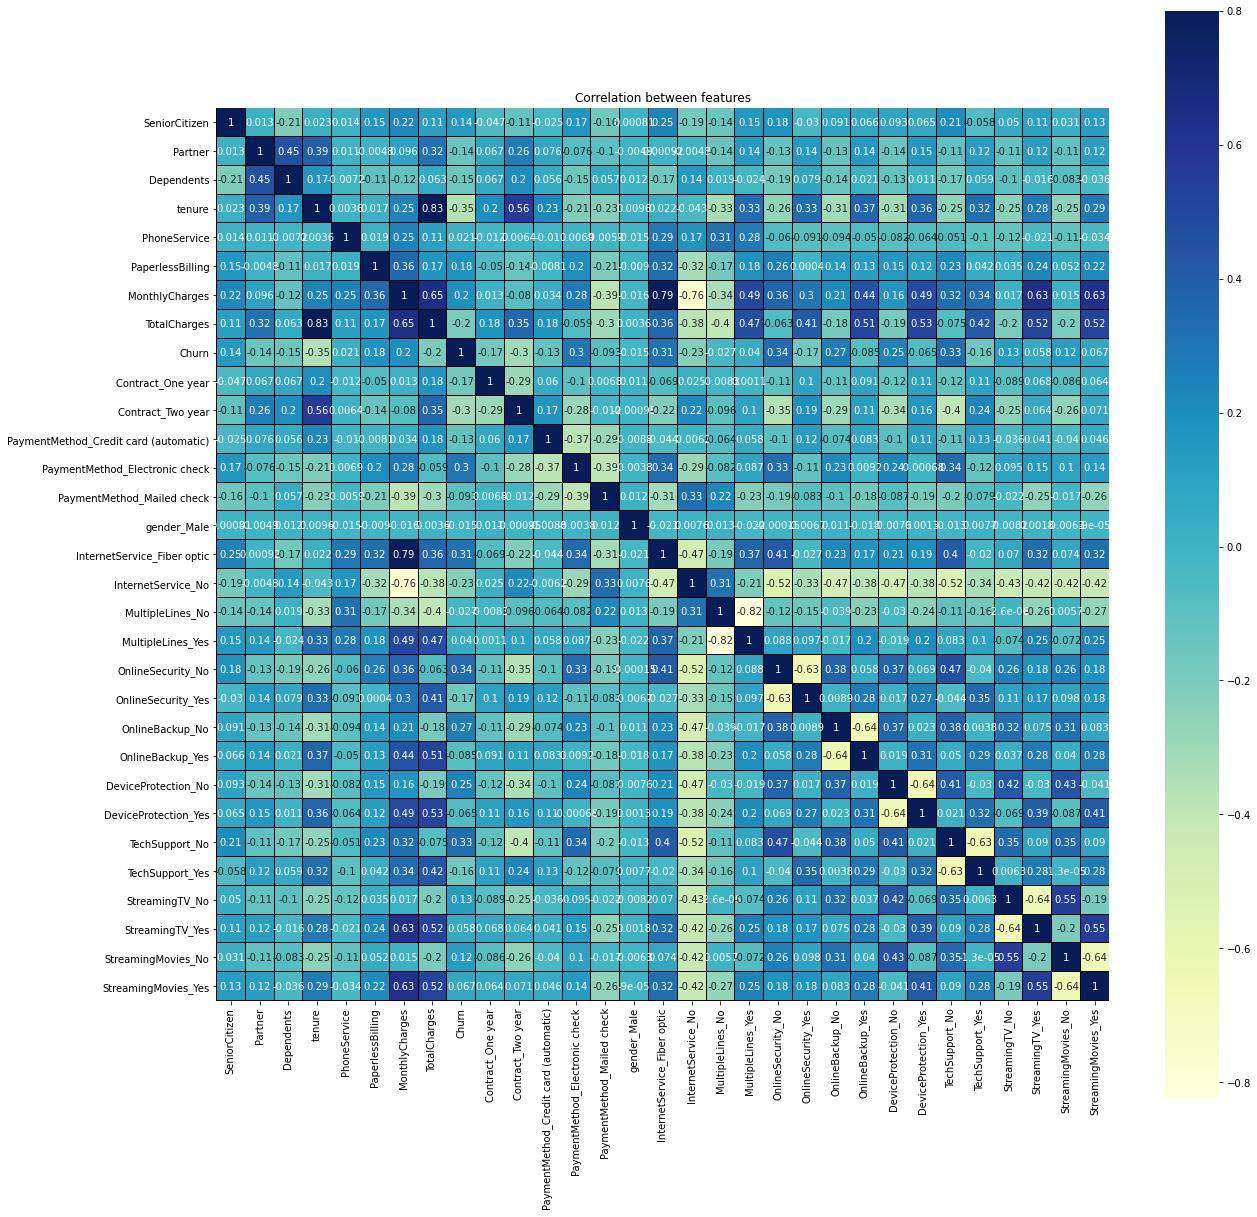

In [58]:
corr = Churn_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- With high corelation we face __redundancy__ issues.
- tenure is highly correlated with TotalCharges 

###  Extract independent column to prepare X 



In [59]:
X = pd.DataFrame()
def log():
    X=Churn_train.drop(['Churn','TotalCharges','InternetService_No','InternetService_Fiber optic','MultipleLines_No'], axis=1)# write your code to create a dataframe of dependent variables excluding 'y' variable
    return X
X = log()

In [60]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,
5442-PPTJY,0,1,1,12,1,0,19.70000,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6261-RCVNS,0,0,0,42,1,0,73.90000,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1
2176-OSJUV,0,1,0,71,1,0,65.15000,0,1,0,0,0,1,1,0,1,0,1,1,0,0,1,1,0,1,0
6161-ERDGD,0,1,1,71,1,0,85.45000,1,0,0,1,0,1,1,0,1,1,0,0,1,0,1,0,1,0,1
2364-UFROM,0,0,0,30,1,0,70.40000,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0


### Extract dependent variable into a dataframe 'y' for model predcition

In [61]:
y = pd.DataFrame()
def log():
    y=Churn_train['Churn'] # write your code to create a dataframe which consists only of dependepent variable
    return y
y = log()

In [62]:
y.head()

customerID
5442-PPTJY    0
6261-RCVNS    1
2176-OSJUV    0
6161-ERDGD    0
2364-UFROM    0
Name: Churn, dtype: int64

###  Splitting X and y intro train and test dataset

In [63]:
from sklearn.model_selection import train_test_split 
def log():
    return train_test_split(X, y, test_size=0.25, random_state=1)  # train test split using train_test_split of 75:25 and random state=1
X_train, X_test, y_train, y_test = log()

### Check the shape of X an y of train dataset.

In [64]:
def log():
    print(X_train.shape)
    print(y_train.shape)
log()

(4218, 26)
(4218,)


### Check the shape of X and y of test dataset.

In [65]:
def log():
    print(X_test.shape)
    print(y_test.shape)
log()

(1407, 26)
(1407,)


# Feature scaling of Continous features

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges']])

X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,
0639-TSIQW,0,0,0,1.40152,1,1,1.25861,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0
6921-OZMFH,0,1,1,-1.12001,1,1,-0.31334,0,0,0,0,1,1,1,1,0,1,0,1,0,0,1,1,0,1,0
6656-GULJQ,0,1,1,1.60487,1,1,0.61319,0,1,1,0,0,1,1,0,1,1,0,0,1,0,1,0,1,0,1
6599-SFQVE,0,0,0,-1.07934,1,1,-0.33663,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1
5071-FBJFS,0,1,1,-1.16068,1,0,-0.49299,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0


###  Instantitate Logistic Regression model using scikit-learn

- Use 'LogisticRegression' from the sklearn class.

  `from sklearn.linear_model import LogisticRegression`

In [67]:
from sklearn.linear_model import LogisticRegression
def log():
    logreg=LogisticRegression() # initiate the logistic regression model to new variable logreg
    return logreg
logreg = log()

### Fit the logistic model on X_train and y_train

- Use the `.fit()` function

In [68]:
def log():
    logreg.fit(X_train,y_train)
log() 

  

### Using the model for prediction

- Use the `.predict()` function.

In [69]:
y_pred_train = pd.DataFrame()
def log():
    y_pred_train = logreg.predict(X_train) # create the model prediction on X_train data using the above created dataframe
    return y_pred_train
y_pred_train = log()

In [70]:
y_pred_test = pd.DataFrame()
def log():
    y_pred_test = logreg.predict(X_test)# create the model prediction on X_test data using the above created dataframe
    return y_pred_test
y_pred_test = log()

###  Model evaluation using accuracy classification score

In [71]:
from sklearn.metrics import accuracy_score
def log():
    print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))#Calculate and print the accuracy score
log()

Accuracy score for test data is: 0.43638948116560056


###  Model evaluation using Confusion matrix

In [72]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test, y_pred_test) #print as an array for heat plot instead of DataFrame
print(cf_matrix)

#cf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
#def log():
    #cf_matrix.index = ['Actual No_Deposit','Actual Deposit']
    #cf_matrix.columns = ['Predicted No_Deposit','Predicted Deposit'# provide confusion matrix index name as['Actual No_Deposit','Actual Deposit']
    # provide confusion matrix index name as['Predicted No_Deposit','Predicted Deposit']
    #print(confusion_matrix)
#log()

[[243 786]
 [  7 371]]


<AxesSubplot:>

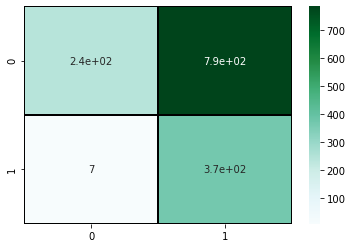

In [73]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,cmap='BuGn',linewidths=1, linecolor='black')


###  Accuracy prediction setting the threshold = 0.75

- Use numpy's function `np.where()`

In [74]:
import numpy as np
def log():
    preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
    print('Accuracy score for test data is:', accuracy_score(y_test,preds1)) # Calculate preds1 keeping the probabilty value as 0.75
    # calculate and print the accuracy using the above mentioned threshold probability
log()

Accuracy score for test data is: 0.44420753375977257


### Accuracy prediction setting the threshold = 0.25

In [75]:
def log():
    preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
    print('Accuracy score for test data is:', accuracy_score(y_test,preds2))# Calculate preds2 keeping the probabilty value as 0.25
    # calculate and print the accuracy using the above mentioned threshold probability
log()

Accuracy score for test data is: 0.43070362473347545


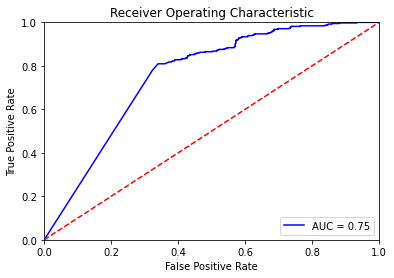

In [76]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
